In [1]:

#from emiss_profiles import checkerboard_profile
import numpy as np
import os
from mcnsh import mcnormspatialhet
from nsh import normalizedspatialhet
import matplotlib.pyplot as plt
import matplotlib.colors as mplcolors
import pandas as pd

In [2]:
domain_x_cells = 40
domain_y_cells = 40
#scenario = 'point-source'
scenario='single-road'
#scenario = 'uniform-basecase'
#scenario = 'fx1fy1'

In [5]:
scenario_df = pd.DataFrame(columns=['scenario', 'NSH', 'scaling-factor'])


In [20]:
cwd = os.getcwd()
shdir = 'sh-patterns'
griddir = f'xres{domain_x_cells}yres{domain_y_cells}'

basecase_filename = 'uniform-basecase.csv'
basecase_array_path = os.path.join(cwd, shdir, griddir, basecase_filename)
basecase_arr = np.genfromtxt(basecase_array_path, delimiter=',')

nsh_dict = {}
i = 0
for filename in os.listdir(os.path.join(cwd, shdir, griddir)):
    if filename == 'fx0fy0.csv':
        continue
    scenario = filename.replace('.csv', '')
    array_path = os.path.join(cwd, shdir, griddir, filename)
    scenario_arr = np.genfromtxt(array_path, delimiter=',')
    scaling_factor = basecase_arr.sum() / scenario_arr.sum()
    scenario_arr = scaling_factor*scenario_arr
    #arr_nsh = mcnormspatialhet(scenario_arr, n_permutes=100000)
    arr_nsh = normalizedspatialhet(scenario_arr)
    nsh_dict[scenario] = arr_nsh
    print(f'{scenario}, scaling factor = {scaling_factor}, NSH = {arr_nsh:4.3f}')

    scenario_df.loc[i, 'scenario'] = scenario
    scenario_df.loc[i, 'NSH'] = arr_nsh
    scenario_df.loc[i, 'scaling-factor'] = scaling_factor
    i += 1

sorted_nsh_dict = dict(sorted(nsh_dict.items(), key=lambda item: item[1]))

fx1fy0, scaling factor = 2.0, NSH = 0.334
fx1fy1, scaling factor = 2.0, NSH = 0.168
fx1fy2, scaling factor = 2.0, NSH = 0.102
fx2fy0, scaling factor = 2.0, NSH = 0.203
fx2fy2, scaling factor = 2.0, NSH = 0.062
uniform-basecase, scaling factor = 1.0, NSH = 0.000
point-source-4x4, scaling factor = 100.0, NSH = 0.918
point-source-1x1, scaling factor = 1600.0, NSH = 1.000
road-single, scaling factor = 40.0, NSH = 0.667
road-double, scaling factor = 20.0, NSH = 0.643
road-quad, scaling factor = 10.0, NSH = 0.606
point-source-6x6, scaling factor = 44.44444444444444, NSH = 0.868
point-source-8x8, scaling factor = 25.0, NSH = 0.818
point-source-16x16, scaling factor = 6.25, NSH = 0.616
road-8x, scaling factor = 5.0, NSH = 0.536
point-source-10x10, scaling factor = 16.0, NSH = 0.768
road-10x, scaling factor = 4.0, NSH = 0.502
road-16x, scaling factor = 2.5, NSH = 0.402


Text(0, 0.5, 'Scaling factor')

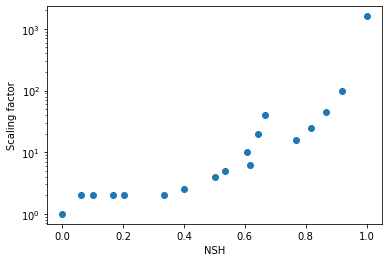

In [7]:
plt.scatter(scenario_df.NSH, scenario_df['scaling-factor'])
plt.yscale('log')
plt.xlabel('NSH')
plt.ylabel('Scaling factor')

In [8]:
scenario_df

,scenario,NSH,scaling-factor
0,fx1fy0,0.334322,2.0
1,fx1fy1,0.167585,2.0
2,fx1fy2,0.101876,2.0
3,fx2fy0,0.203236,2.0
4,fx2fy2,0.061931,2.0
5,uniform-basecase,0.0,1.0
6,point-source-4x4,0.917654,100.0
7,point-source-1x1,1.0,1600.0
8,road-single,0.666524,40.0
9,road-double,0.643254,20.0


/tmp/ipykernel_82397/932463839.py:3: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_bad('white')#'#dedede')


1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


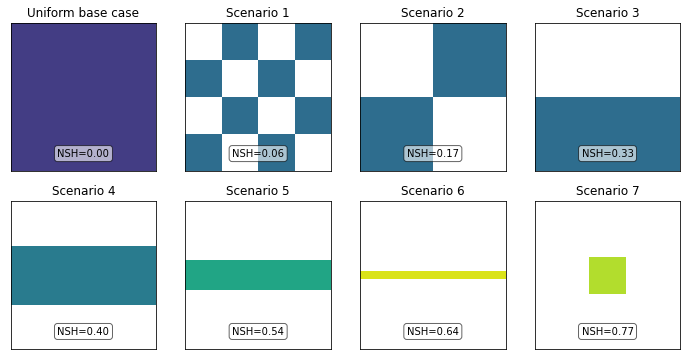

In [58]:
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
cmap = plt.cm.get_cmap('viridis')
cmap.set_bad('white')#'#dedede')

analysis_scenarios = ['uniform-basecase', 'fx2fy2', 'fx1fy1', 'fx1fy0', 
                      'road-double', 'point-source-10x10', 'road-8x', 'road-16x'
                     ]
analysis_nsh_dict = {key: val for key, val in sorted_nsh_dict.items() if key in analysis_scenarios}

i = 1

for ax, scenario in zip(axs.flatten(), analysis_nsh_dict):
    nshval = sorted_nsh_dict[scenario]
    ax.set_xticks([])
    ax.set_yticks([])
    filename = f'{scenario}.csv'
    array_path = os.path.join(cwd, shdir, griddir, filename)
    scenario_arr = np.genfromtxt(array_path, delimiter=',')
    scaling_factor = basecase_arr.sum() / scenario_arr.sum()
    scenario_arr = scaling_factor*scenario_arr
    vmin=.5
    vmax=25
    print(scenario_arr.min())
    ax.pcolormesh(scenario_arr, norm=mplcolors.LogNorm(vmin, vmax), 
                  #norm=mplcolors.Normalize(vmin,vmax),
                  cmap=cmap)
    meanval = scenario_arr.mean()
    variance = scenario_arr.std()**2

    if scenario == 'uniform-basecase':
        title_name = 'Uniform base case'
    else:
        title_name = f'Scenario {i}'
        i += 1
    ax.set_title(title_name)
    ax.text(x=.5, y=.1, s=f'SH={nshval:3.2f}', horizontalalignment='center', transform=ax.transAxes,
            bbox=dict(facecolor='white', alpha=.6, boxstyle='round'))
    
plt.savefig(f'SH-analysis-patterns.pdf', format='pdf', bbox_inches='tight')


In [27]:
analysis_nsh_dict

{'uniform-basecase': 0.0,
 'fx2fy2': 0.0619308756943207,
 'fx1fy1': 0.1675848056087327,
 'fx1fy0': 0.3343216322563847,
 'road-16x': 0.40154716179217387,
 'road-8x': 0.5363375565593407,
 'road-double': 0.6432539779945964,
 'point-source-10x10': 0.7681313623660289}

In [54]:
scenario_arr.std()

3.872983346207417